In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Here, state is the categorical data and rest of the datas have  numerical values. Before encoding States we need to check for missing values and duplicate values.
In linear regression outlier treatment is most significant one, so we also need to perform it 

In [3]:
#Checking for missing values 

In [4]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
duplicate_values=dataset.duplicated().sum()
print('number of duplicate values present in the dataset: ',duplicate_values)   ## No duplicate values present in the dataset

number of duplicate values present in the dataset:  0


Here, in the data set no missing values present 

In [6]:
#Checking for basic information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# Import label encoder 
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'State'. 
dataset['State']= label_encoder.fit_transform(dataset['State']) 
  
dataset['State'].unique()

array([2, 0, 1])

In [8]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


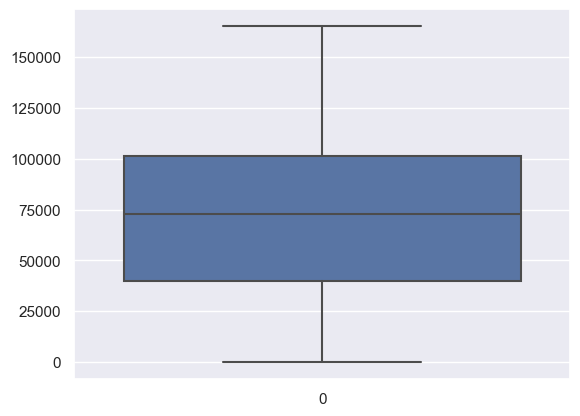

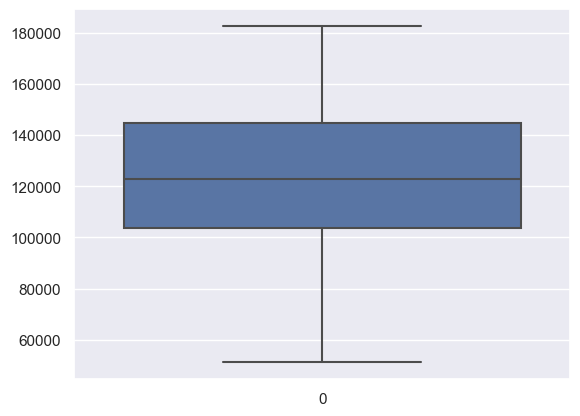

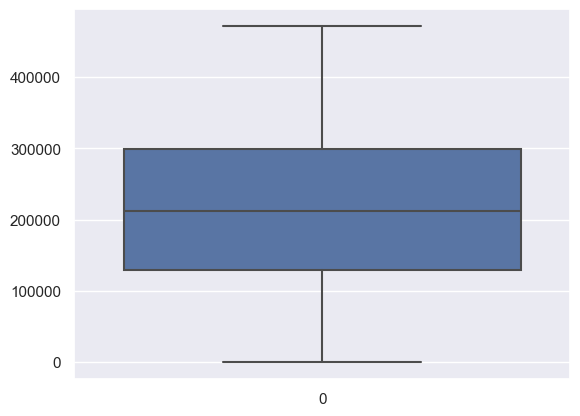

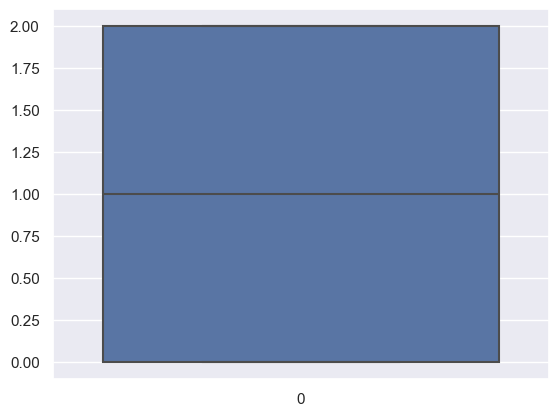

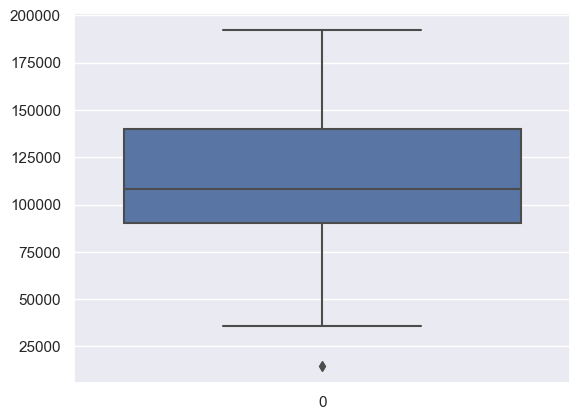

In [9]:
def boxplots(col):                              ## Checking for outliers
    sns.boxplot(dataset[col])
    plt.show()
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

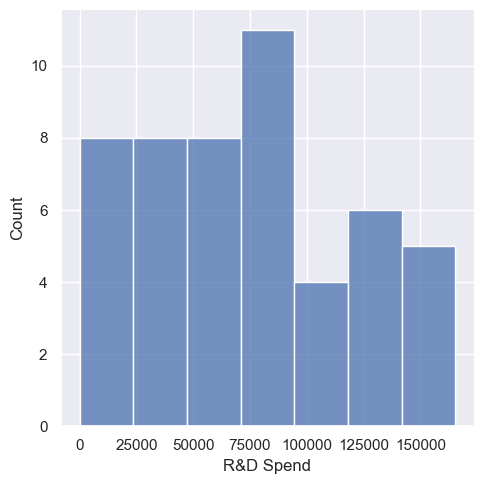

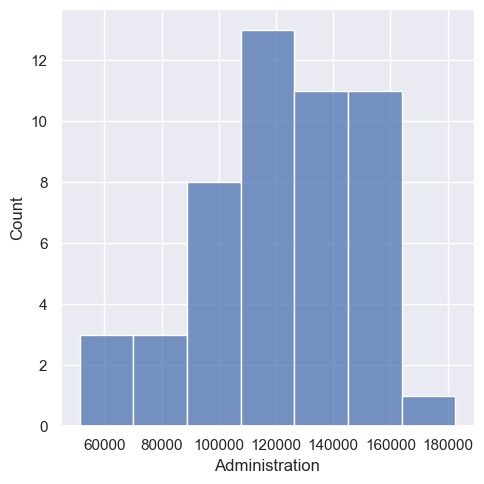

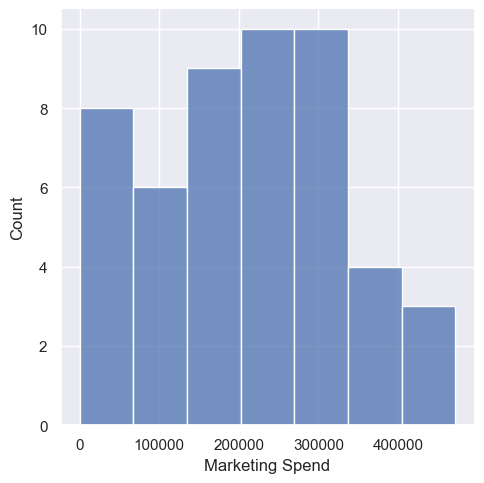

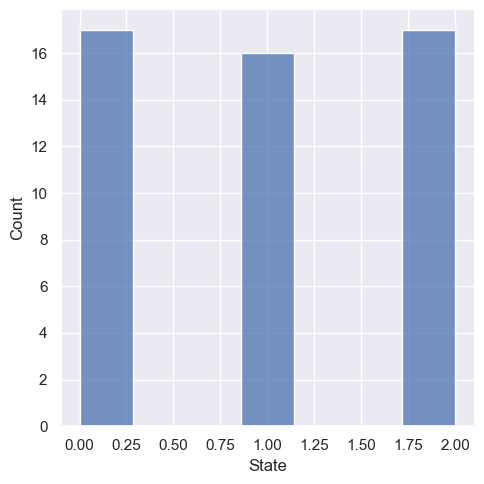

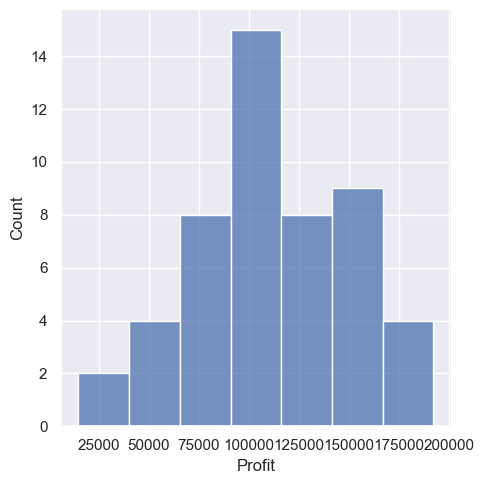

In [10]:
def displots(col):
    sns.displot(dataset[col])
    plt.show()
for i in list(dataset.select_dtypes(exclude='object').columns)[0:]:
    displots(i)

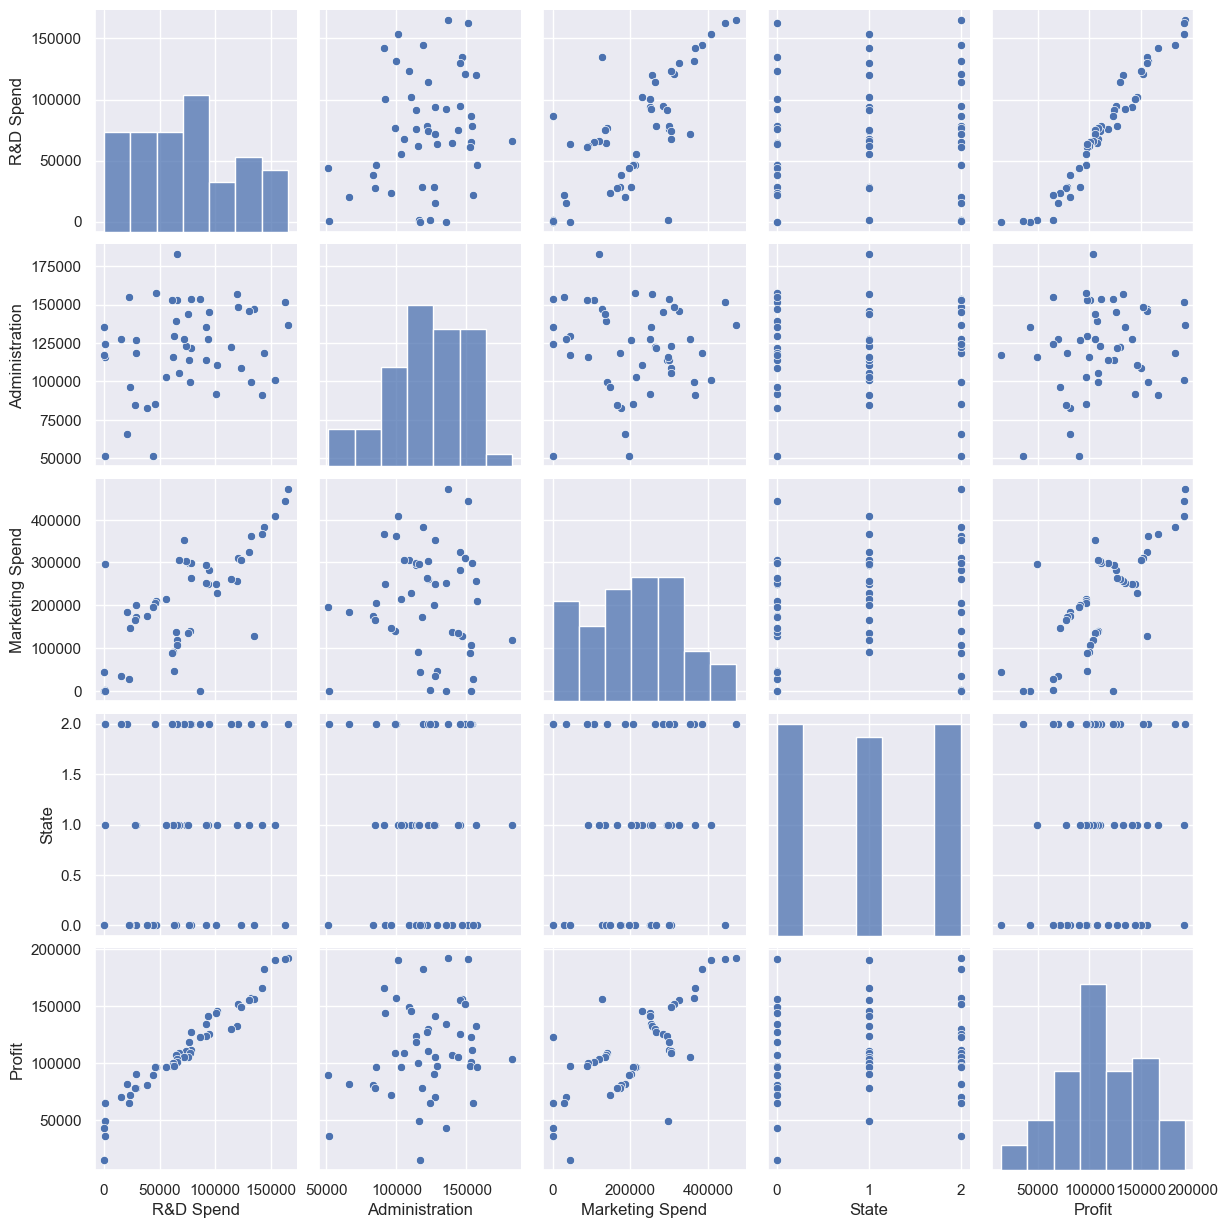

In [11]:
sns.pairplot(dataset)
plt.show()

In [12]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


Spliting the data into dependent and independent variable

In [13]:
x=dataset[['Administration','Marketing Spend','State','R&D Spend']]


##Independent variable

In [14]:
x

,Administration,Marketing Spend,State,R&D Spend
0,136897.80,471784.10,2,165349.20
1,151377.59,443898.53,0,162597.70
2,101145.55,407934.54,1,153441.51
3,118671.85,383199.62,2,144372.41
4,91391.77,366168.42,1,142107.34
5,99814.71,362861.36,2,131876.90
6,147198.87,127716.82,0,134615.46
7,145530.06,323876.68,1,130298.13
8,148718.95,311613.29,2,120542.52
9,108679.17,304981.62,0,123334.88


In [15]:
y=dataset['Profit']        ## Dependent variable

In [16]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

## Feature scalling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)


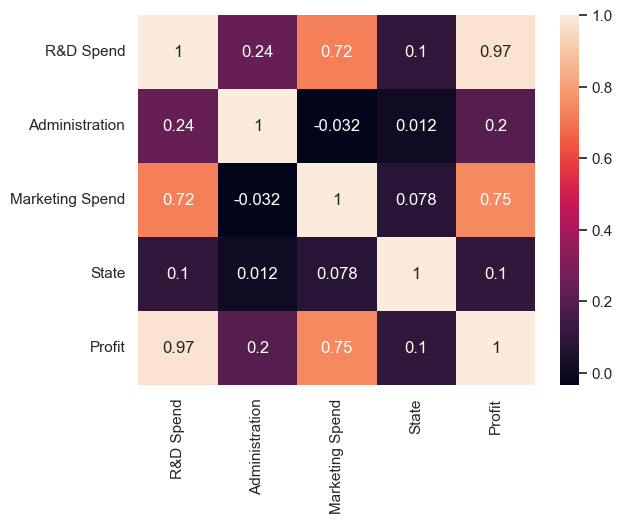

<Figure size 1500x1500 with 0 Axes>

In [19]:
sns.heatmap(dataset.corr(),annot=True)
plt.figure(figsize=(15,15))
plt.show()

# Splitting the data into training and testing

In [20]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)

Here 25% of the data is used for testing and 75% data is used for model building

# Model building

### Random Forest Model 

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=500)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [34]:
# Predict test data 
y_pred_train_rf = rf_regressor.predict(x_train)
y_pred_test_rf = rf_regressor.predict(x_test)

In [35]:
# Evaluate your model
from sklearn.metrics import r2_score
print("Training Accuracy :", r2_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_rf))

Training Accuracy : 0.9872055514073236

Test Accuracy : 0.9514265785181405
